# Loan Default - Exploratory Data Analysis

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

In [2]:
loan = pd.read_csv('loan.csv')

#Verify with loan DF - head
loan.head()

C:\Users\jsaikumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Get insight of the structure
print(loan.info())
print(loan.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
(39717, 111)


In [4]:
#Get the row count of each column in the DF
print(loan.count())

id                                39717
member_id                         39717
loan_amnt                         39717
funded_amnt                       39717
funded_amnt_inv                   39717
term                              39717
int_rate                          39717
installment                       39717
grade                             39717
sub_grade                         39717
emp_title                         37258
emp_length                        38642
home_ownership                    39717
annual_inc                        39717
verification_status               39717
issue_d                           39717
loan_status                       39717
pymnt_plan                        39717
url                               39717
desc                              26777
purpose                           39717
title                             39706
zip_code                          39717
addr_state                        39717
dti                               39717


In [5]:
#Get rid of columns that has no data at all
loan = loan[[ cols for cols in loan if loan[cols].count() > 0 ]]

#Get the no of columns available now
print(len(loan.columns))

57


In [6]:
#Get the row count of each column in the DF after dropping of null columns
print(loan.count())

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
term                          39717
int_rate                      39717
installment                   39717
grade                         39717
sub_grade                     39717
emp_title                     37258
emp_length                    38642
home_ownership                39717
annual_inc                    39717
verification_status           39717
issue_d                       39717
loan_status                   39717
pymnt_plan                    39717
url                           39717
desc                          26777
purpose                       39717
title                         39706
zip_code                      39717
addr_state                    39717
dti                           39717
delinq_2yrs                   39717
earliest_cr_line              39717
inq_last_6mths              

In [7]:
#Get the percentage of missing data for each column
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [8]:
#Drop the columns that has more number of data missing
loan = loan.drop(['emp_title','desc','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','pub_rec_bankruptcies',], axis=1)

#Get the percentage of missing data for each column after dropping
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util          

# Impute the missing values
Prepare the annual_inc column by segmenting the values to impute the emp_length column

In [9]:
#Get the stats of annual_inc 
print(loan['annual_inc'].describe())

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [10]:
#Segment the values of annual inc
bins = [0,10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 6000000]
labels = [ '<10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','>90000']
loan['annual_inc_cat'] = pd.cut(loan['annual_inc'], bins=bins, labels=labels)

#Convert the Derived segmented column type to Object
loan['annual_inc_cat'] = loan['annual_inc_cat'].astype('object')

In [11]:
#Get the value counts of each category in emp_length
print(loan.emp_length.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64


Impute the missing values of emp_length with the mode value of each group of target(loan_status) column and the closely related(annual_inc) column.

In [12]:
#Function to Identify the Mode for a group of data
def mode_in_group(grp):
    try:
        mode_val = grp.value_counts().index[0]
        return(mode_val)
    except IndexError:
        return('value_missing')

#Impute the missing(na) values with the mode value for each group of data on loan_status and annual_inc     
loan['emp_length'] = loan.groupby(['loan_status','annual_inc_cat'])['emp_length'].apply(lambda x: x.fillna(mode_in_group(x)))

#Remove the records with missing value
loan = loan[loan['emp_length'] != 'value_missing']

In [13]:
#Get the percentage of missing data for each column after imputing the missing values
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_length                    0.00
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util          

Remove the missing rows for the columns "last_credit_pull_d", "revol_util" as the missing percentage is very less.

In [14]:
#Remove the missing rows by selecting not null records
loan = loan[loan['last_credit_pull_d'].notnull()]
loan = loan[loan['revol_util'].notnull()]

Drop the columns that is irrelevate

In [15]:
#drop the irrelevant columns 
loan = loan.drop(['last_pymnt_d','tax_liens','collections_12_mths_ex_med','chargeoff_within_12_mths'], axis=1)

In [16]:
#Get the percentage of missing data for each column after cleaning the columns and data 
round(100 * (loan.isnull().sum()/len(loan.index)), 2)

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
pymnt_plan                 0.0
url                        0.0
purpose                    0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
initial_list_status        0.0
out_prncp                  0.0
out_prnc

In [17]:
#Verify the data in all the columns
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
count,3.966400e+04,3.966400e+04,39664.000000,39664.000000,39664.000000,39664.000000,3.966400e+04,39664.000000,39664.000000,39664.000000,...,39664.000000,39664.000000,39664.000000,39664.000000,39664.000000,39664.000000,39664.000000,39664.0,39664.0,39664.0
mean,6.833403e+05,8.507436e+05,11228.283204,10956.189492,10406.445427,324.788282,6.899905e+04,13.319266,0.146506,0.869176,...,11577.711693,9801.972918,2265.479627,1.361813,95.195029,12.387697,2681.806317,1.0,0.0,0.0
std,2.106493e+05,2.655808e+05,7456.539304,7187.063350,7128.301868,208.880532,6.379053e+04,6.676762,0.491607,1.070400,...,8943.139301,7065.400620,2609.193500,7.291360,689.095498,148.716815,4449.285858,0.0,0.0,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
25%,5.163262e+05,6.669995e+05,5500.000000,5400.000000,5000.000000,167.080000,4.051716e+04,8.180000,0.000000,0.000000,...,5125.537500,4600.000000,662.845000,0.000000,0.000000,0.000000,219.040000,1.0,0.0,0.0
50%,6.660180e+05,8.512290e+05,10000.000000,9637.500000,8975.000000,280.615000,5.900000e+04,13.410000,0.000000,1.000000,...,9295.320000,8000.000000,1350.870000,0.000000,0.000000,0.000000,547.125000,1.0,0.0,0.0
75%,8.378690e+05,1.047523e+06,15000.000000,15000.000000,14400.000000,430.805000,8.240000e+04,18.600000,0.000000,1.000000,...,15811.120000,13700.000000,2836.285000,0.000000,0.000000,0.000000,3300.375000,1.0,0.0,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0


check for outliers and drop the columns with 0 values

In [18]:
#drop columns with 0 values
loan = loan.drop(['policy_code','acc_now_delinq','delinq_amnt'], axis=1)

In [19]:
#Analyse the outliers for annual_inc 
print(loan['annual_inc'].quantile([0.95,0.99,1.0]))

0.95     142000.00
0.99     234997.48
1.00    6000000.00
Name: annual_inc, dtype: float64


In [20]:
#clear the outliers in annual_inc
loan = loan[loan['annual_inc']<=234997.48]
print(len(loan))

39267


In [21]:
#Verify the data in all the columns after removing outliers
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,3.926700e+04,3.926700e+04,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,...,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000,39267.000000
mean,6.833699e+05,8.507867e+05,11142.708254,10874.195253,10329.084655,322.236964,65559.628725,13.380547,0.145491,0.866733,...,50.780778,50.542738,12061.295908,11480.422281,9722.457178,2242.704932,1.360310,94.773566,12.199085,2655.489320
std,2.106470e+05,2.656009e+05,7375.980522,7108.527618,7049.623495,206.211981,35209.831672,6.661474,0.490053,1.068022,...,371.803376,370.456786,8929.639157,8830.426539,6982.381778,2573.163892,7.285505,686.438089,146.646865,4404.831198
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4000.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.165105e+05,6.671680e+05,5500.000000,5375.000000,5000.000000,166.500000,40000.000000,8.275000,0.000000,0.000000,...,0.000000,0.000000,5567.352248,5098.605000,4550.000000,659.885000,0.000000,0.000000,0.000000,217.985000
50%,6.660240e+05,8.512350e+05,10000.000000,9600.000000,8925.000000,279.100000,58000.080000,13.480000,0.000000,1.000000,...,0.000000,0.000000,9841.692863,9251.440000,8000.000000,1340.720000,0.000000,0.000000,0.000000,542.210000
75%,8.377970e+05,1.047364e+06,15000.000000,15000.000000,14284.385310,426.240000,81000.000000,18.640000,0.000000,1.000000,...,0.000000,0.000000,16435.163950,15686.140000,13475.000000,2808.910000,0.000000,0.000000,0.000000,3267.250000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,234996.000000,29.990000,11.000000,8.000000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


Clean the values and convert the types

In [22]:
#Strip blank space in the values for term column
loan['term'] = loan['term'].str.strip()

#Strip % sign in the values and convert to float for int_rate column
loan['int_rate'] = loan['int_rate'].str.rstrip('%')
loan['int_rate'] = loan['int_rate'].astype('float')
loan['int_rate'] = round(loan['int_rate'])

#Strip % sign in the values and convert to float for revol_util column
loan['revol_util'] = loan['revol_util'].str.rstrip('%')
loan['revol_util'] = loan['revol_util'].astype('float')
loan['revol_util'] = round(loan['revol_util'])

# Filter the Data Frame based on Target Variable(Class Label)

In [23]:
#Take copy of loan DF to master DF
master_loan = loan.copy()

In [24]:
#Identify Unique values in Target Variable
print(master_loan['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current']


# Classify into Categorical and Quantitative Variables

In [25]:
#Get all categorical columns of type Object
master_loan_cat = master_loan.select_dtypes(include = ['O'])
print(master_loan_cat.columns)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_credit_pull_d', 'application_type',
       'annual_inc_cat'],
      dtype='object')


In [26]:
#Dropping unwanted columns in Categorical columns
master_loan_cat.drop(['pymnt_plan','url','zip_code','initial_list_status','application_type'],axis=1,inplace=True)
print(master_loan_cat.columns)

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'earliest_cr_line', 'last_credit_pull_d',
       'annual_inc_cat'],
      dtype='object')


C:\Users\jsaikumar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
#Get all Quantitative columns of type float and int
master_loan_num = master_loan.select_dtypes(include = ['float64', 'int64'])

#include the loan_status column for analysis
master_loan_num['loan_status'] = master_loan_cat['loan_status']
print(master_loan_num.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'loan_status'],
      dtype='object')


C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [28]:
#Dropping unwanted columns in quantitative columns
master_loan_num.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],axis=1,inplace=True)
print(master_loan_num.columns)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'loan_status'],
      dtype='object')


C:\Users\jsaikumar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Univariate - Categorical Variables Analysis

In [29]:
#Filter the Target variable DF with only Charged Off
master_cat = master_loan_cat[master_loan_cat['loan_status'] == 'Charged Off']
master_num = master_loan_num[master_loan_num['loan_status'] == 'Charged Off']

Text(0.5,1,'Total Terms')

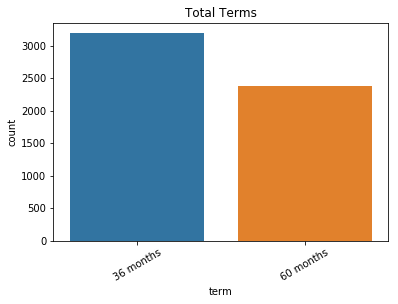

In [30]:
#term variable
df = master_cat.groupby('term')['term'].count().reset_index(name='count').sort_values('count',ascending=False)
q = sns.barplot(x="term", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total Terms')

Text(0.5,1,'Total Grade')

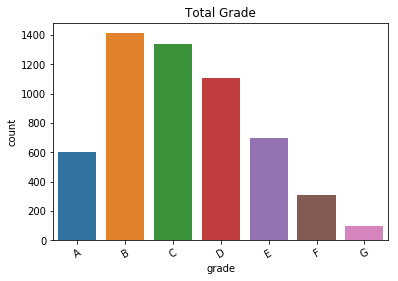

In [31]:
#grade variable
df = master_cat.groupby('grade')['grade'].count().reset_index(name='count').sort_values('grade',ascending=True)
q = sns.barplot(x="grade", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total Grade')

Text(0.5,1,'Total sub_grade')

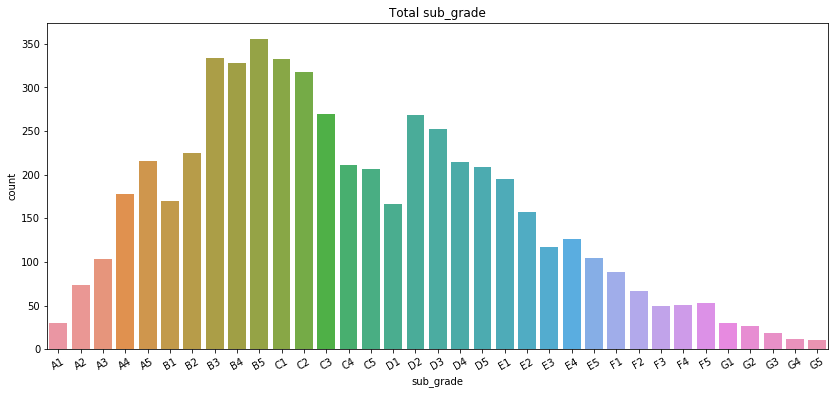

In [32]:
#sub_grade variable
df = master_cat.groupby('sub_grade')['sub_grade'].count().reset_index(name='count').sort_values('sub_grade',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="sub_grade", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total sub_grade')

Text(0.5,1,'Total Employee Length')

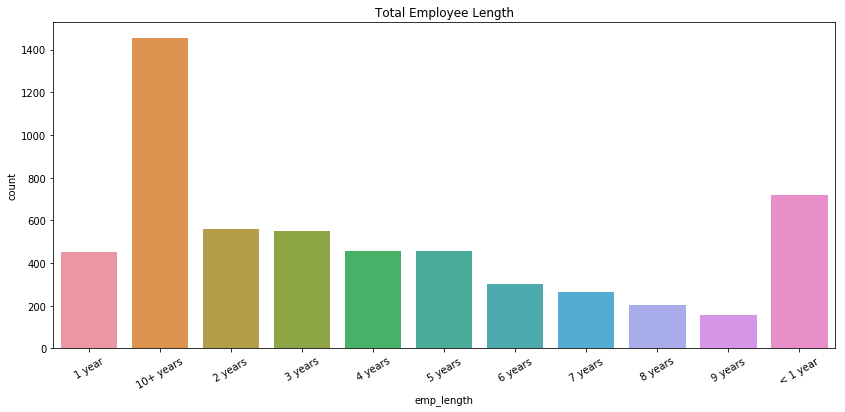

In [33]:
#emp_length variable
df = master_cat.groupby('emp_length')['emp_length'].count().reset_index(name='count').sort_values('emp_length',ascending=True)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
q = sns.barplot(x="emp_length", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total Employee Length')

Text(0.5,1,'Total home ownership')

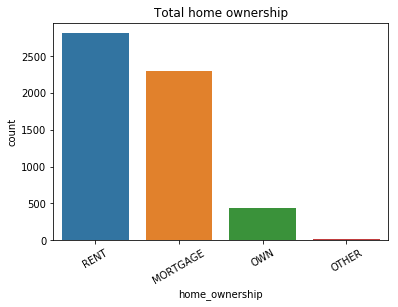

In [34]:
#home_ownership variable
df = master_cat.groupby('home_ownership')['home_ownership'].count().reset_index(name='count').sort_values('count',ascending=False)
q = sns.barplot(x="home_ownership", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total home ownership')

Text(0.5,1,'Total verification status')

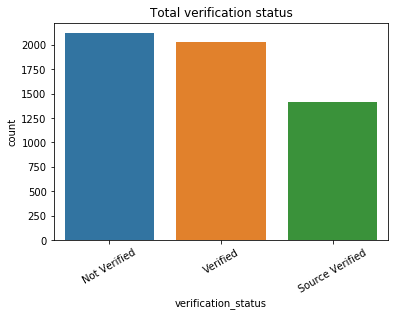

In [35]:
#verification_status variable
df = master_cat.groupby('verification_status')['verification_status'].count().reset_index(name='count').sort_values('count',ascending=False)
q = sns.barplot(x="verification_status", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total verification status')

Text(0.5,1,'Total purpose')

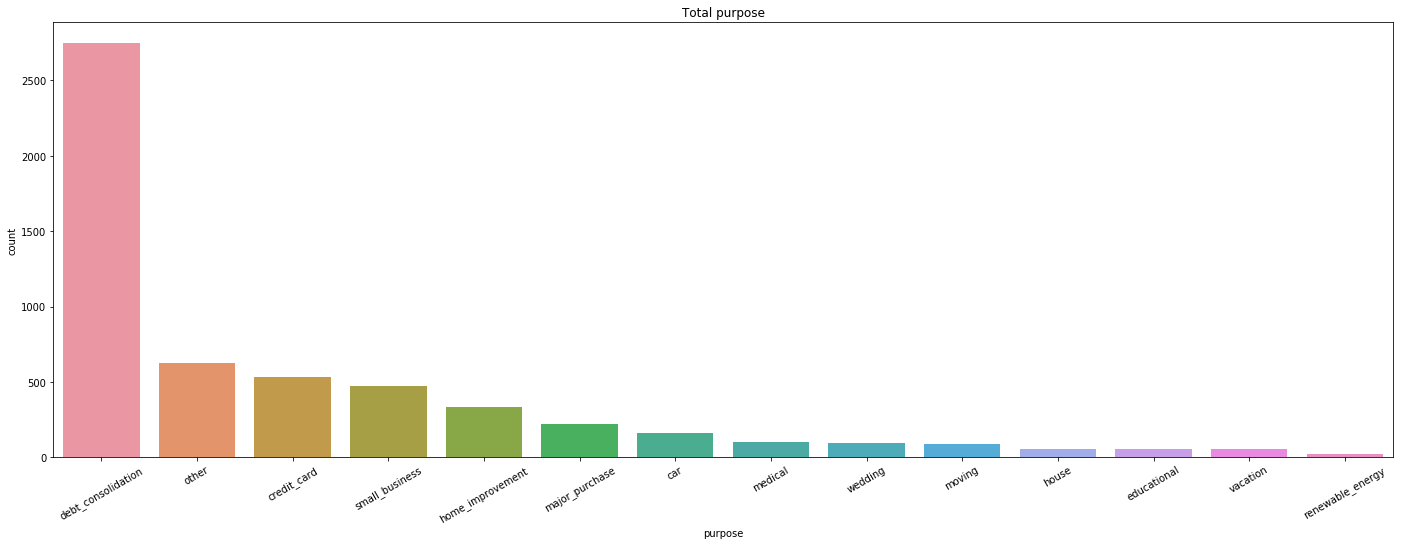

In [36]:
#purpose variable
df = master_cat.groupby('purpose')['purpose'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
q = sns.barplot(x="purpose", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total purpose')

Text(0.5,1,'Total addr_state')

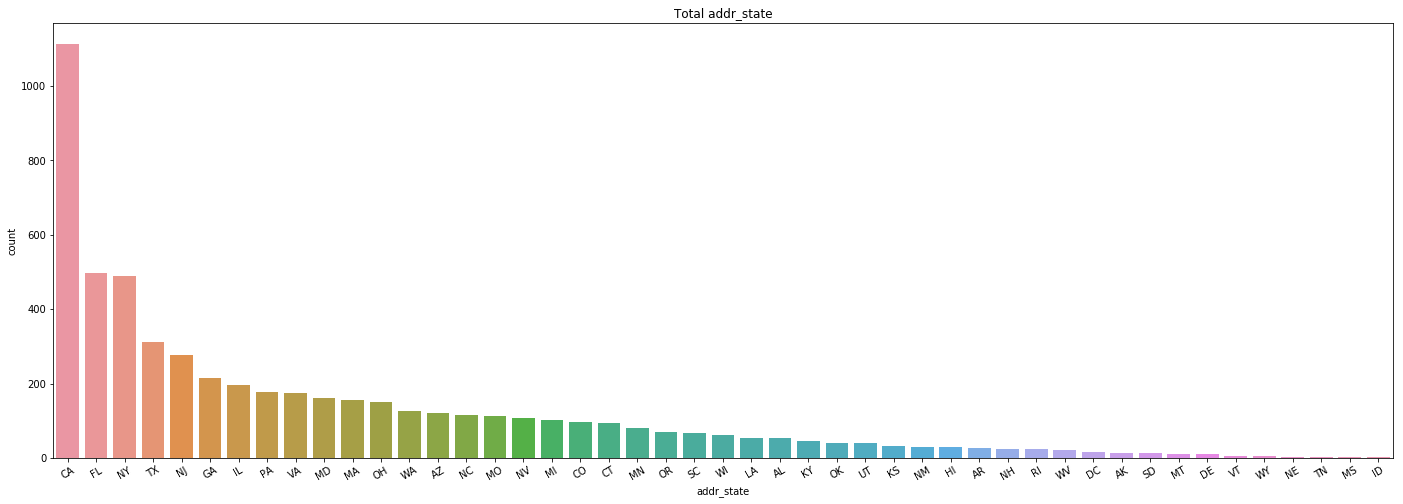

In [37]:
#addr_state variable
df = master_cat.groupby('addr_state')['addr_state'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
q = sns.barplot(x="addr_state", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total addr_state')

# Derived Metrics Analysis

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

Text(0.5,1,'Total issue_d_year')

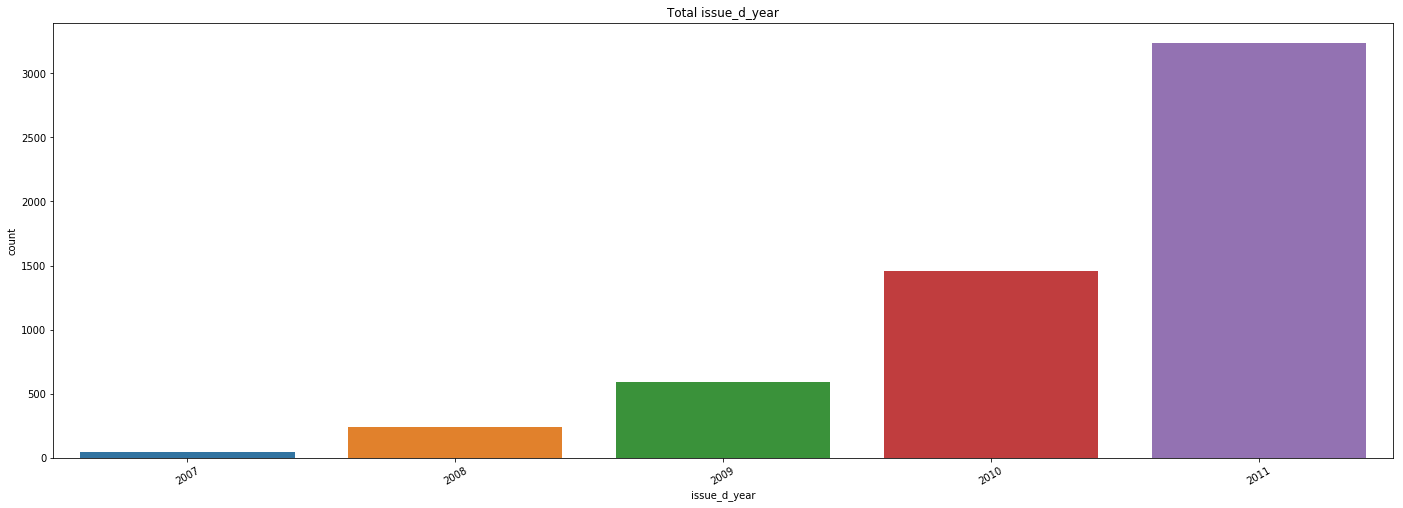

In [38]:
#issue_d variable
#Convert the issue date to datetime type
master_cat['issue_d'] = pd.to_datetime(master_cat['issue_d'],format='%b-%y')
#extract month
master_cat['issue_d_mon'] = master_cat['issue_d'].map(lambda x : x.month)
#extract year
master_cat['issue_d_year'] = master_cat['issue_d'].map(lambda x : x.year)

df = master_cat.groupby('issue_d_year')['issue_d_year'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
q = sns.barplot(x="issue_d_year", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total issue_d_year')

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,1,'Total earliest_cr_line_year')

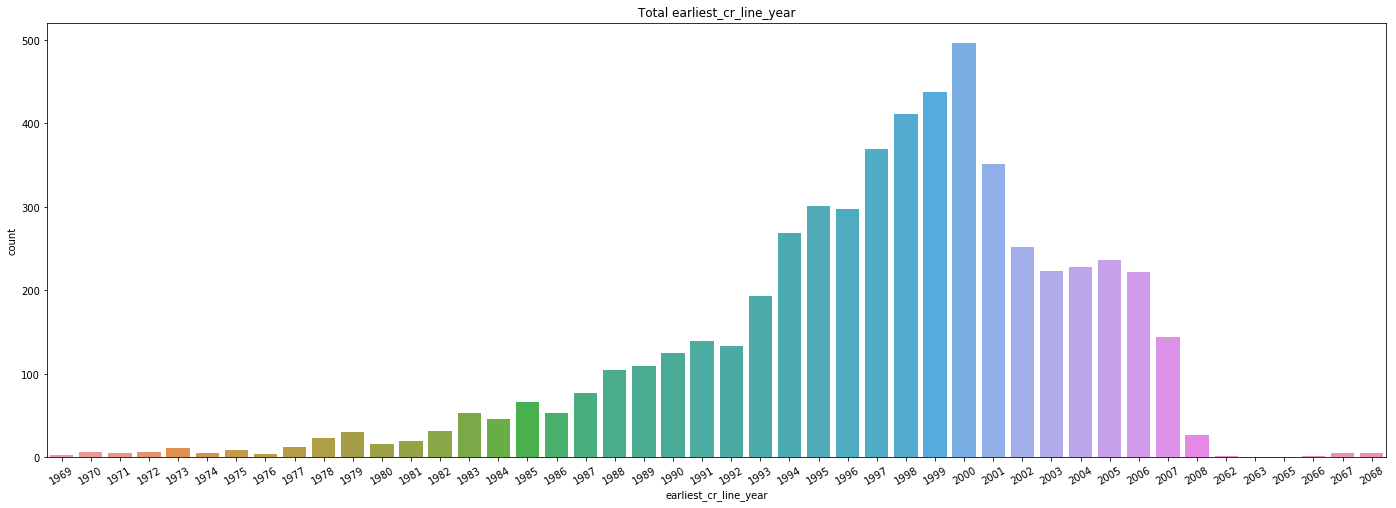

In [39]:
#earliest_cr_line variable
#Get the count of Grouped by loan_status and plot
master_cat['earliest_cr_line'] = pd.to_datetime(master_cat['earliest_cr_line'], format='%b-%y')
#extract year
master_cat['earliest_cr_line_year'] = master_cat['earliest_cr_line'].map(lambda x : x.year)

df = master_cat.groupby('earliest_cr_line_year')['earliest_cr_line_year'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
q = sns.barplot(x="earliest_cr_line_year", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total earliest_cr_line_year')

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0.5,1,'Total last_credit_pull_d_year')

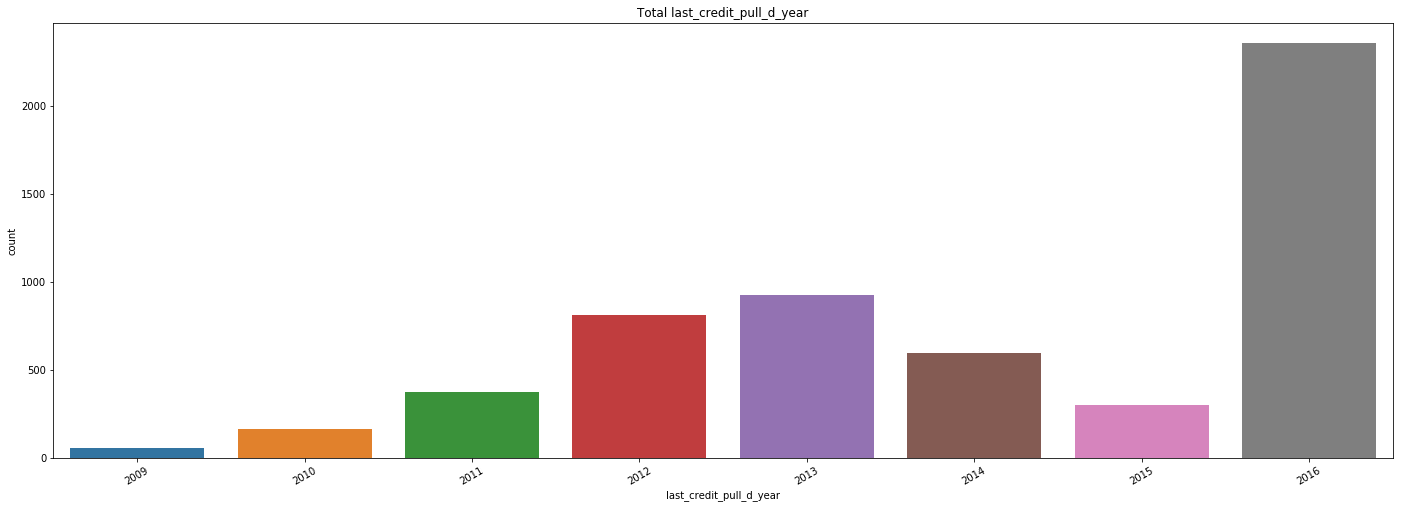

In [40]:
#earliest_cr_line variable
#Get the count of Grouped by loan_status and plot
master_cat['last_credit_pull_d'] = pd.to_datetime(master_cat['last_credit_pull_d'], format='%b-%y')
#extract year
master_cat['last_credit_pull_d_year'] = master_cat['last_credit_pull_d'].map(lambda x : x.year)

df = master_cat.groupby('last_credit_pull_d_year')['last_credit_pull_d_year'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
q = sns.barplot(x="last_credit_pull_d_year", y="count", data=df)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Total last_credit_pull_d_year')

# Univariate - Quantitative Variables Analysis

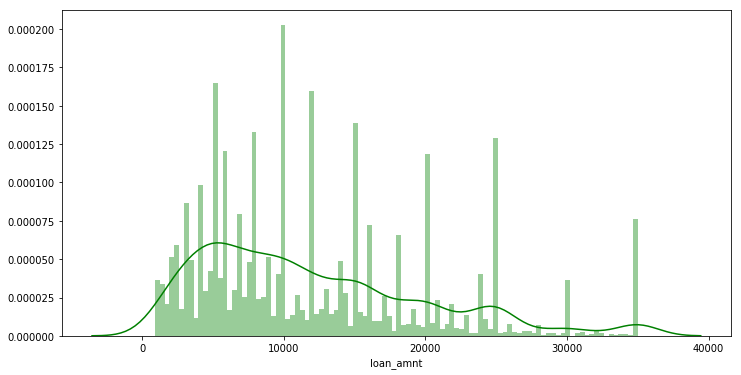

In [41]:
#loan_amnt distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['loan_amnt'], color='g', bins=100, hist_kws={'alpha': 0.4});

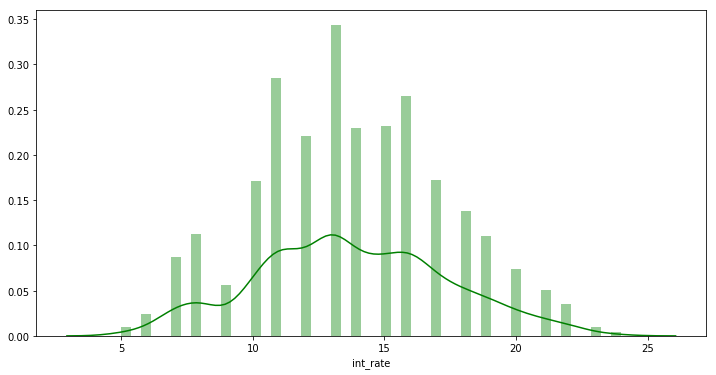

In [42]:
#int_rate distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['int_rate'], color='g', bins=50, hist_kws={'alpha': 0.4});

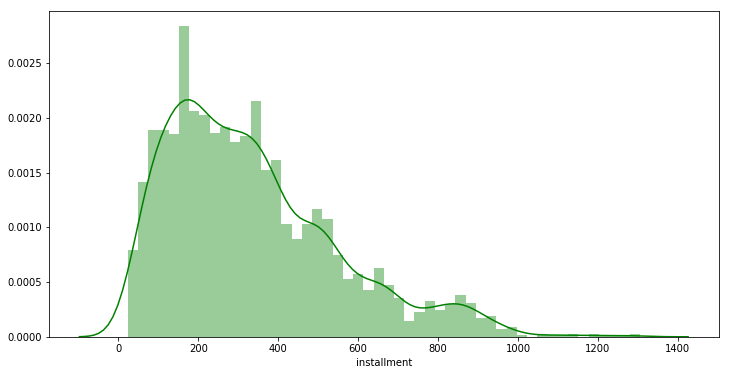

In [43]:
#installment distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['installment'], color='g', bins=50, hist_kws={'alpha': 0.4});

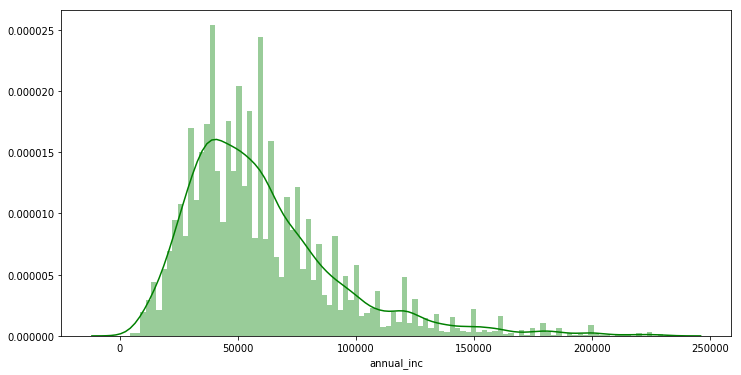

In [44]:
#annual_inc distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['annual_inc'], color='g', bins=100, hist_kws={'alpha': 0.4});

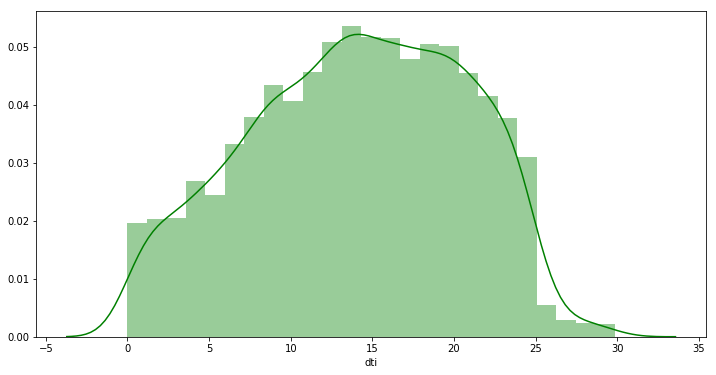

In [45]:
#dti distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['dti'], color='g', bins=25, hist_kws={'alpha': 0.4});

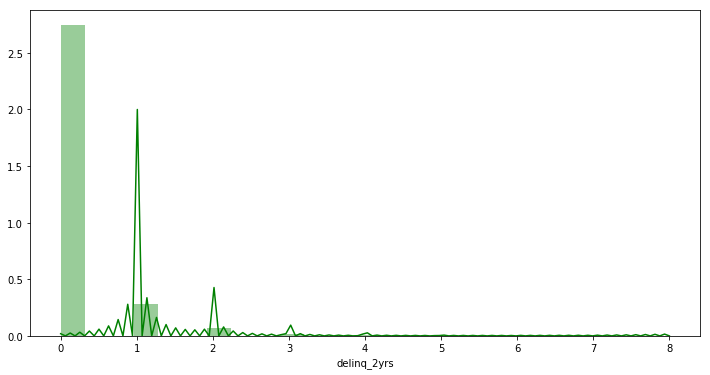

In [46]:
#delinq_2yrs distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['delinq_2yrs'], color='g', bins=25, hist_kws={'alpha': 0.4});

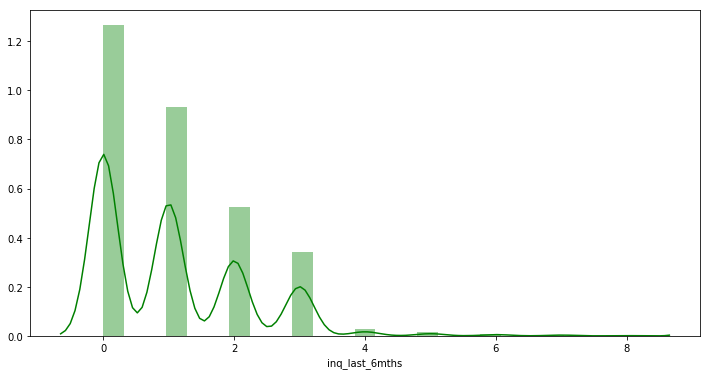

In [47]:
#inq_last_6mths distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['inq_last_6mths'], color='g', bins=25, hist_kws={'alpha': 0.4});

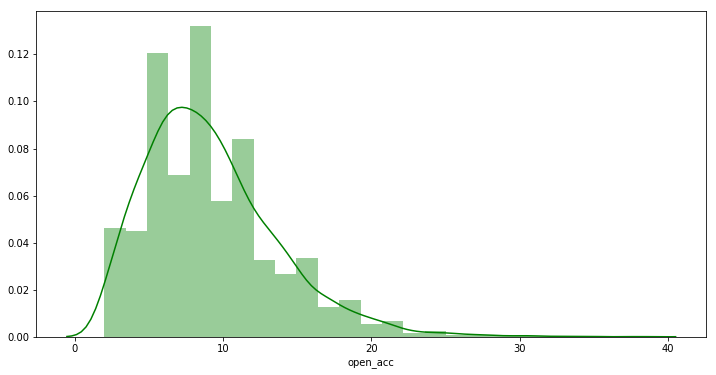

In [48]:
#open_acc distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['open_acc'], color='g', bins=25, hist_kws={'alpha': 0.4});

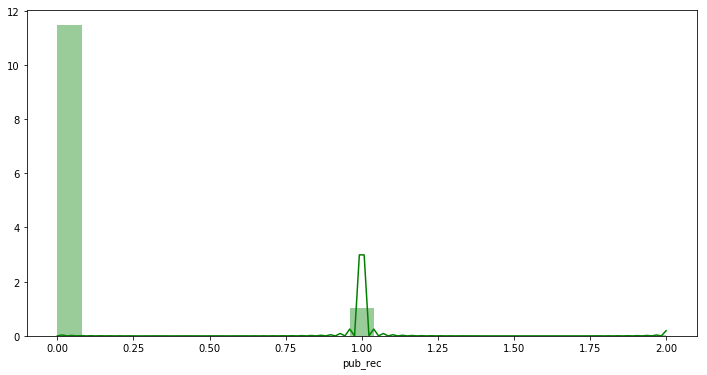

In [49]:
#pub_rec distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['pub_rec'], color='g', bins=25, hist_kws={'alpha': 0.4});

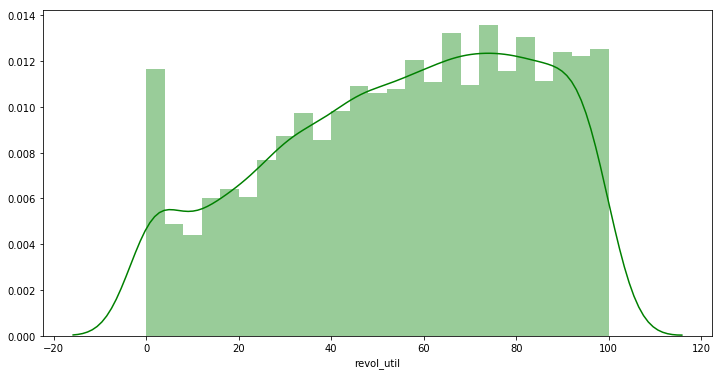

In [50]:
#revol_util distribution
plt.figure(figsize=(12, 6))
sns.distplot(master_num['revol_util'], color='g', bins=25, hist_kws={'alpha': 0.4});

# Bivariate - Categorical Variables Analysis

In [51]:
#Filter the Target variable DF with only Charged Off
master_cat = master_loan_cat[master_loan_cat['loan_status'] != 'Current']
master_num = master_loan_num[master_loan_num['loan_status'] != 'Current']

Analyse Term against loan_status

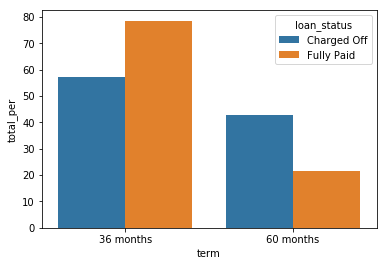

In [52]:
#Get the count of Grouped by loan_status and term
term = master_cat.groupby(['loan_status','term'])['term'].count()

#Derive total percent for each group
term_per = term.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')

#Sort the values in descending order
term_per.sort_values('total_per', ascending=False)

#plot the barchart
sns.barplot(x='term', y='total_per', hue='loan_status',data=term_per)

Note that the term with 60 months has got more defaults 

Now let's Analyse grade and subgrade against loan_status

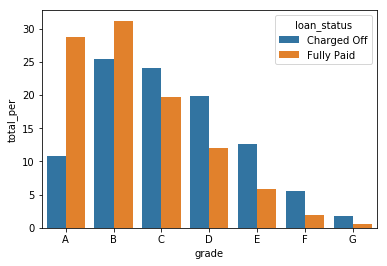

In [53]:
#Get the count of Grouped by loan_status and grade
grade = master_cat.groupby(['loan_status','grade'])['grade'].count()

#Derive total percent for each group
grade_per = grade.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')

#Sort the values in descending order
grade_per.sort_values('total_per', ascending=False)

#plot the barchart
sns.barplot(x='grade', y='total_per', hue='loan_status',data=grade_per)

Lets get the insights of each grade with the sub grade

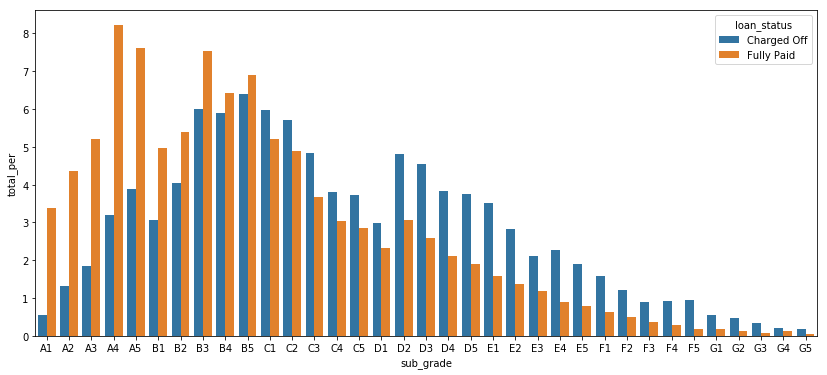

In [54]:
#Get the count of Grouped by loan_status and sub_grade
sub_grade = master_cat.groupby(['loan_status','sub_grade'])['sub_grade'].count()

#Derive total percent for each group
sub_grade_per = sub_grade.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')

#Sort the values in descending order
sub_grade_per.sort_values('total_per', ascending=False)

#Plot the barchart
fig, ax = plt.subplots()
fig.set_size_inches(14,6)
sns.barplot(x='sub_grade', y='total_per', hue='loan_status',data=sub_grade_per)

Note that the most number of defaults have happened in SubGrade and Grade between C to G.

Now lets Analyse emp_length against loan_status

In [55]:
#Get the count of Grouped by loan_status and emp_length
emp_length = master_cat.groupby(['loan_status','emp_length'])['emp_length'].count()

#Derive total percent for each group
emp_length_per = emp_length.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')

#Sort the values in descending order
emp_length_per.sort_values('total_per', ascending=False)

#Plot the barchart
#fig, ax = plt.subplots()
#fig.set_size_inches(12,6)
#sns.barplot(x='emp_length', y='total_per', hue='loan_status',data=emp_length_per)

,loan_status,emp_length,total_per
1,Charged Off,10+ years,26.14
12,Fully Paid,10+ years,22.78
21,Fully Paid,< 1 year,13.06
10,Charged Off,< 1 year,12.88
13,Fully Paid,2 years,11.30
14,Fully Paid,3 years,10.50
2,Charged Off,2 years,10.06
3,Charged Off,3 years,9.90
15,Fully Paid,4 years,8.77
16,Fully Paid,5 years,8.32


Though There is some observation of defaults in emp_length > 10 years, we cannot generalize the analysis with this variable. 

Now lets see home ownership against loan status for collateral  

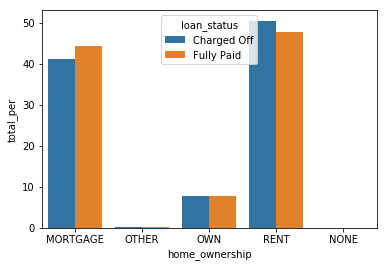

In [56]:
#Get the count of Grouped by loan_status and home_ownership
home_ownership = master_cat.groupby(['loan_status','home_ownership'])['home_ownership'].count()

#Derive total percent for each group
home_ownership_per = home_ownership.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')

#Sort the values in descending order
home_ownership_per.sort_values('total_per', ascending=False)

#Plot the barchart
sns.barplot(x='home_ownership', y='total_per', hue='loan_status',data=home_ownership_per)

Note that the home_ownership with RENT has got more defaults in the collateral category

Now lets look at verification_status against loan_status

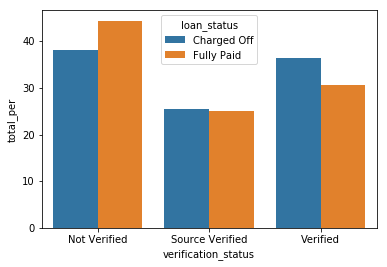

In [57]:
#Get the count of Grouped by loan_status and verification_status
verification_status = master_cat.groupby(['loan_status','verification_status'])['verification_status'].count()

#Derive total percent for each group
verification_status_per = verification_status.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')

#Sort the values in descending order
verification_status_per.sort_values('total_per', ascending=False)

#Plot the barchart
sns.barplot(x='verification_status', y='total_per', hue='loan_status',data=verification_status_per)

Though there is some observation of defaults in verified status, there is no significant difference

Now lets look at the pupose against loan status

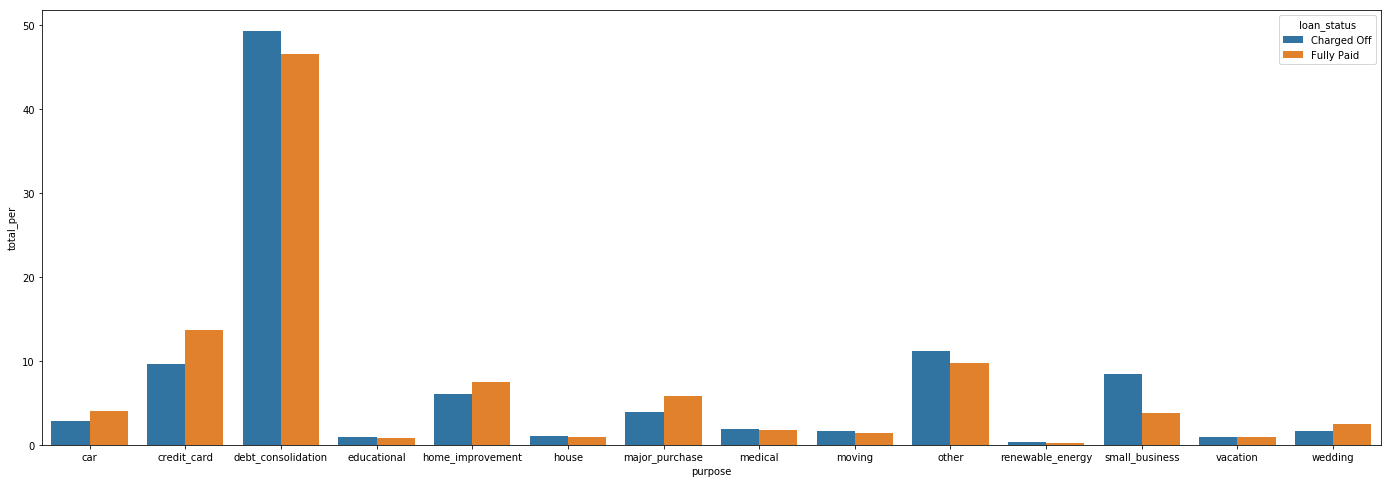

In [58]:
#Get the count of Grouped by loan_status and plot
purpose = master_cat.groupby(['loan_status','purpose'])['purpose'].count()
purpose_per = purpose.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
purpose_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='purpose', y='total_per', hue='loan_status',data=purpose_per)

There is no significant difference in purpose

Now lets look at the addr_state against loan status

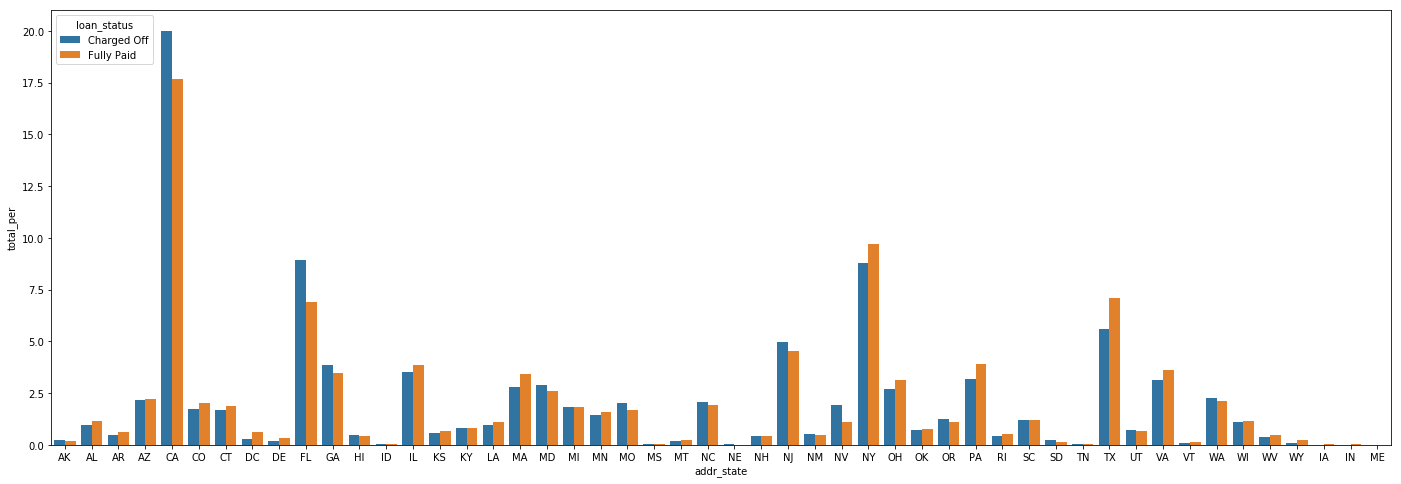

In [59]:
#Get the count of Grouped by loan_status and plot
addr_state = master_cat.groupby(['loan_status','addr_state'])['addr_state'].count()
addr_state_per = addr_state.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
addr_state_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='addr_state', y='total_per', hue='loan_status',data=addr_state_per)

There is no significant difference in Address State

Now lets look at the issue_d against loan status

# Derived Metrics Analysis

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

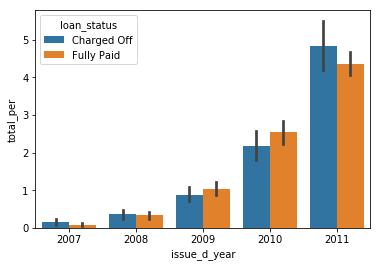

In [60]:
#Convert the issue date to datetime type
master_cat['issue_d'] = pd.to_datetime(master_cat['issue_d'],format='%b-%y')

#extract month
master_cat['issue_d_mon'] = master_cat['issue_d'].map(lambda x : x.month)
#extract year
master_cat['issue_d_year'] = master_cat['issue_d'].map(lambda x : x.year)

#Get the count of Grouped by loan_status and plot
issue_d_year = master_cat.groupby(['loan_status','issue_d_year','issue_d_mon'])['issue_d_mon'].count()
issue_d_year_per = issue_d_year.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
issue_d_year_per.sort_values('total_per', ascending=False)
#sns.barplot(x='issue_d_mon', y='total_per', hue='loan_status',data=issue_d_year_per)
sns.barplot(x='issue_d_year', y='total_per', hue='loan_status',data=issue_d_year_per)

there is no significant difference in issue date

Now lets look at the earliest_cr_line against loan status

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


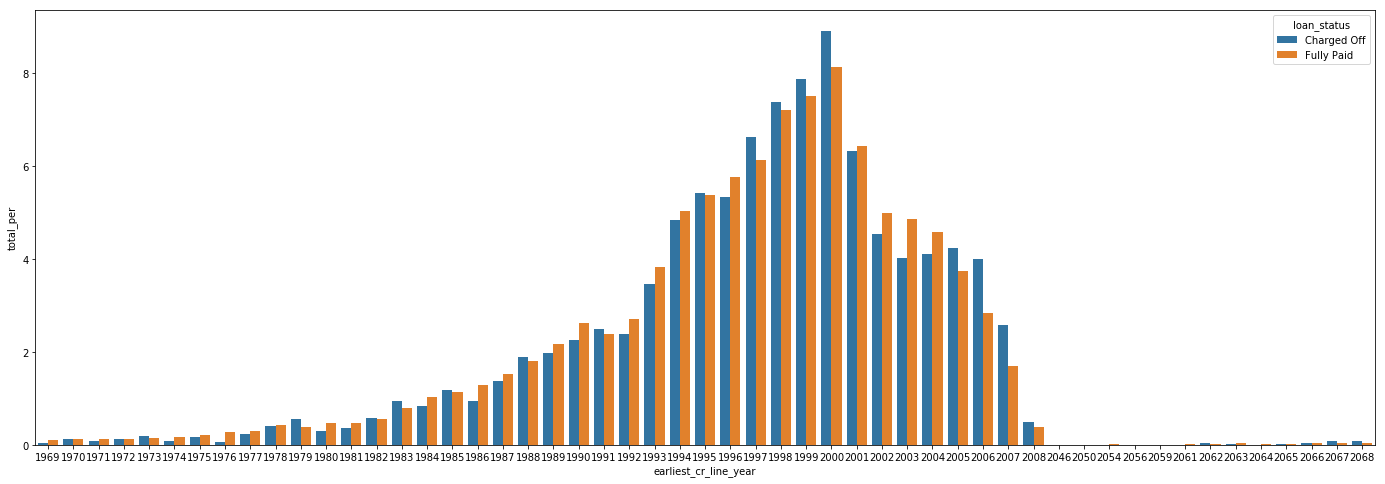

In [61]:
#Get the count of Grouped by loan_status and plot
master_cat['earliest_cr_line_year'] = pd.to_datetime(master_cat['earliest_cr_line'], format='%b-%y')
#extract year
master_cat['earliest_cr_line_year'] = master_cat['earliest_cr_line_year'].map(lambda x : x.year)

#plot the barchart
earliest_cr_line_year = master_cat.groupby(['loan_status','earliest_cr_line_year'])['earliest_cr_line_year'].count()
earliest_cr_line_year_per = earliest_cr_line_year.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
earliest_cr_line_year_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='earliest_cr_line_year', y='total_per', hue='loan_status',data=earliest_cr_line_year_per)

there is no significant difference in earlist credit line

Now lets look at the last_credit_pull_d against loan status

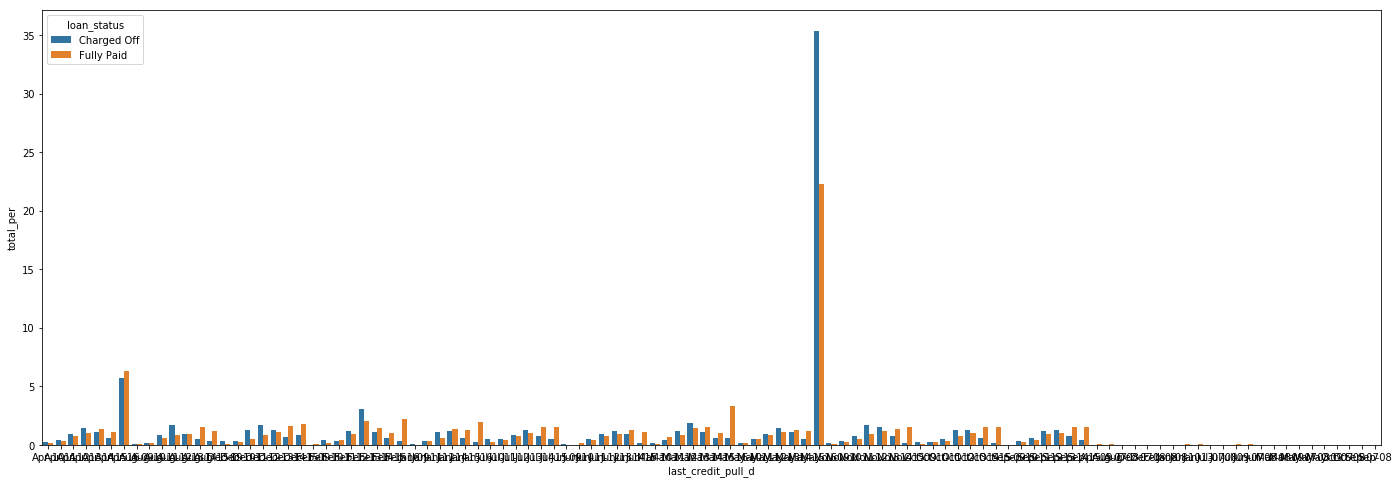

In [62]:
#For last_credit_pull_d against loan_status
last_credit_pull_d = master_cat.groupby(['loan_status','last_credit_pull_d'])['last_credit_pull_d'].count()
last_credit_pull_d_per = last_credit_pull_d.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
last_credit_pull_d_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='last_credit_pull_d', y='total_per', hue='loan_status',data=last_credit_pull_d_per)

There is no significant difference in last credit pull date

# Bivariate - Quantitative Variables and Segmented Analysis

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


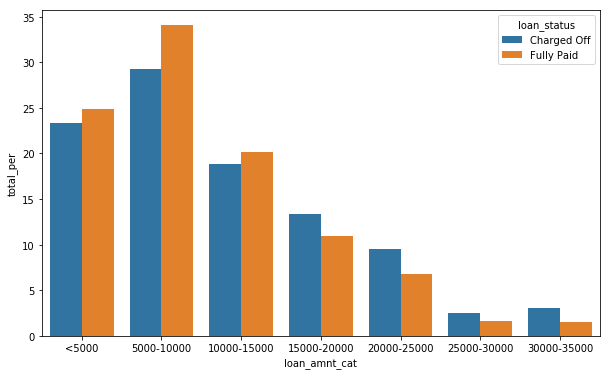

In [63]:
#Binning the loan amount
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
labels = [ '<5000','5000-10000','10000-15000','15000-20000','20000-25000','25000-30000','30000-35000']
master_num['loan_amnt_cat'] = pd.cut(master_num['loan_amnt'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
loan_amnt_cat = master_num.groupby(['loan_status','loan_amnt_cat'])['loan_amnt_cat'].count()
loan_amnt_cat_per = loan_amnt_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
loan_amnt_cat_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.barplot(x='loan_amnt_cat', y='total_per', hue='loan_status',data=loan_amnt_cat_per)

loan amount greater than 15000 has got more defaults

Now lets see int_rate against loan_status

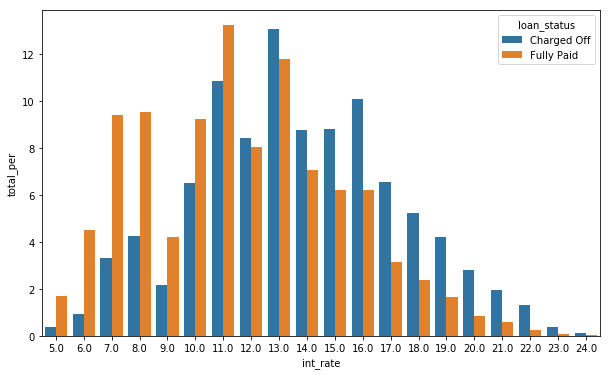

In [64]:
#Get the count of Grouped by loan_status and plot
int_rate = master_num.groupby(['loan_status','int_rate'])['int_rate'].count()
int_rate_per = int_rate.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
int_rate_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.barplot(x='int_rate', y='total_per', hue='loan_status',data=int_rate_per)

Interest Rate which is greater than 12 has got more number of defaults

Now lets look at the installment

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


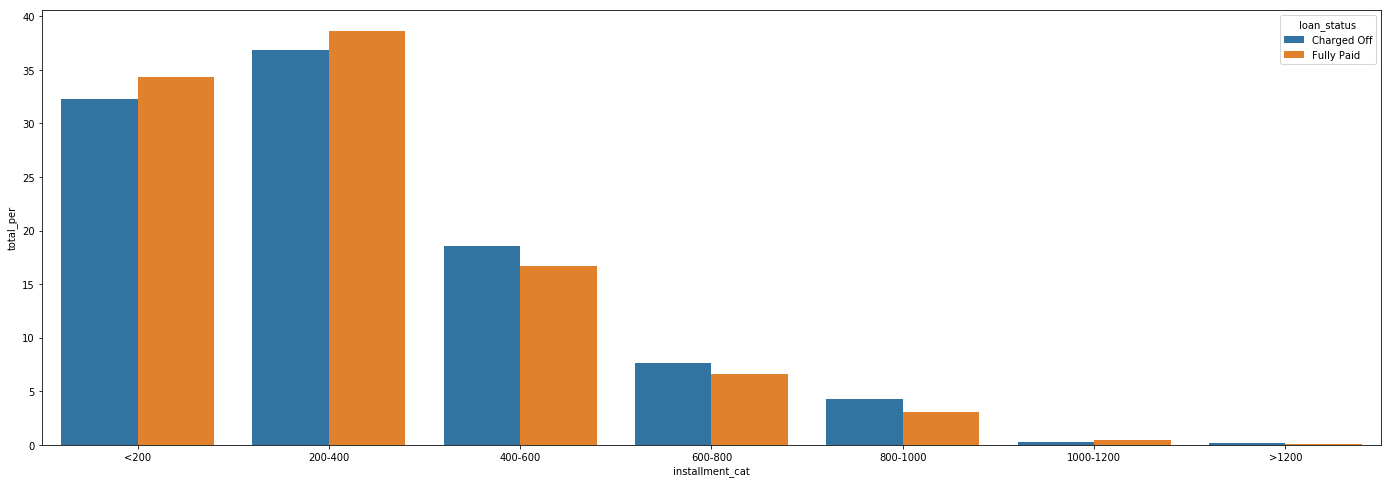

In [65]:
#Binning the installment column
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
labels = [ '<200','200-400','400-600','600-800','800-1000','1000-1200','>1200']
master_num['installment_cat'] = pd.cut(master_num['installment'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
installment = master_num.groupby(['loan_status','installment_cat'])['installment_cat'].count()
installment_per = installment.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
installment_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='installment_cat', y='total_per', hue='loan_status',data=installment_per)

There is no significant difference in installment

Lets look at the annaul income

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


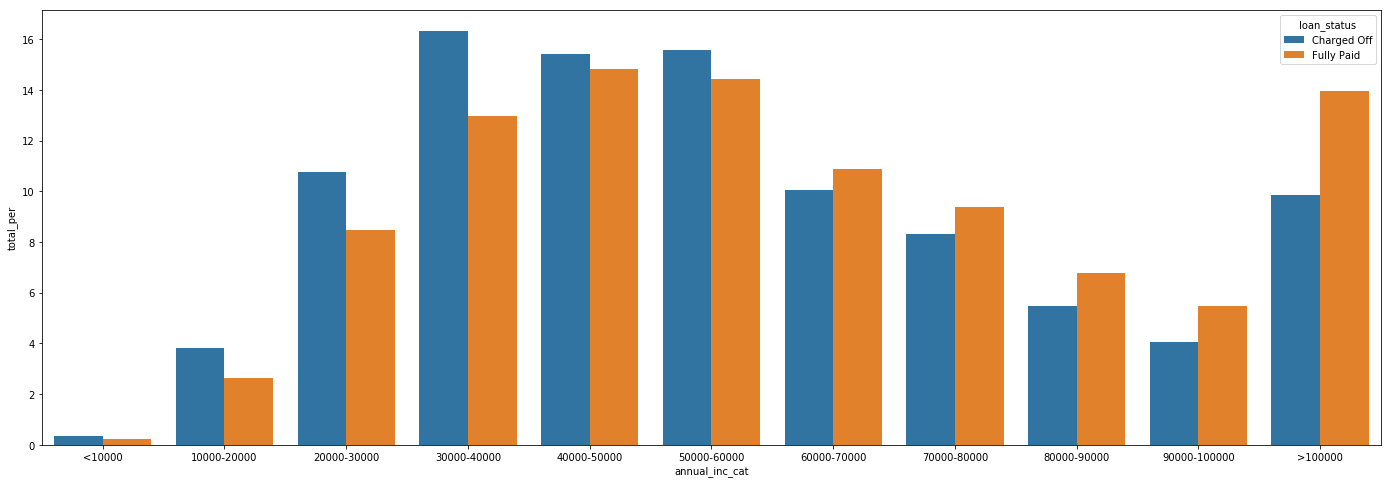

In [66]:
#For annual_inc against loan_status
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 250000]
labels = [ '<10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','>100000']
master_num['annual_inc_cat'] = pd.cut(master_num['annual_inc'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
annual_inc_cat = master_num.groupby(['loan_status','annual_inc_cat'])['annual_inc_cat'].count()
annual_inc_cat_per = annual_inc_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
annual_inc_cat_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='annual_inc_cat', y='total_per', hue='loan_status',data=annual_inc_cat_per)

Annual Income less than 50000 has got some defaults

Now lets look at the dti against loan status

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


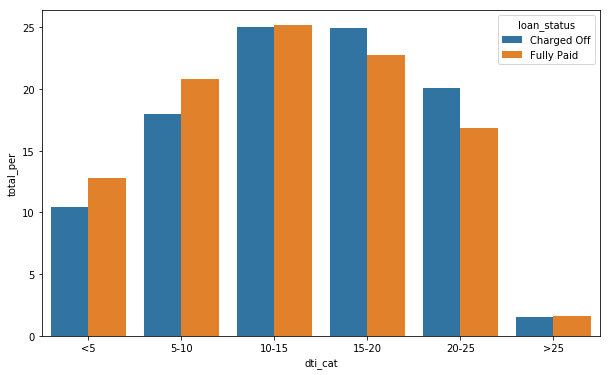

In [67]:
#Binning DTI column
bins = [0, 5, 10, 15, 20, 25, 30]
labels = [ '<5','5-10','10-15','15-20','20-25','>25']
master_num['dti_cat'] = pd.cut(master_num['dti'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
dti_cat = master_num.groupby(['loan_status','dti_cat'])['dti_cat'].count()
dti_cat_per = dti_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
dti_cat_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.barplot(x='dti_cat', y='total_per', hue='loan_status',data=dti_cat_per)

Dti greater than 15 have the most number of defaults

Now lets look at the delinq_2yrs against loan status

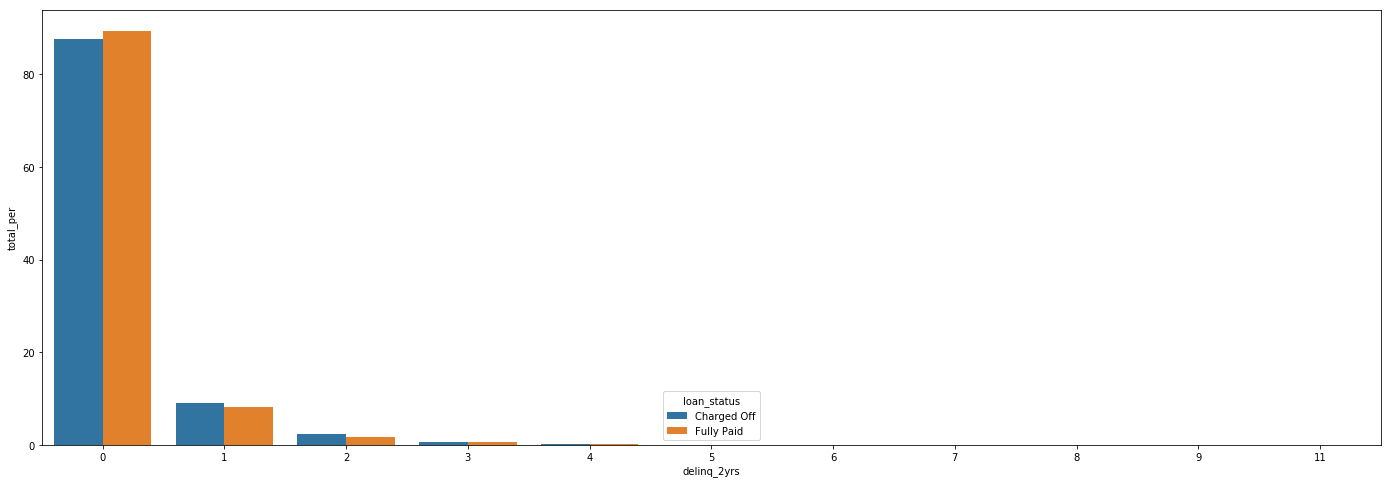

In [68]:
#Get the count of Grouped by loan_status and plot
delinq_2yrs = master_num.groupby(['loan_status','delinq_2yrs'])['delinq_2yrs'].count()
delinq_2yrs_per = delinq_2yrs.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
delinq_2yrs_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='delinq_2yrs', y='total_per', hue='loan_status',data=delinq_2yrs_per)

delinq_2yrs greater than 0 has got more defaults

Now lets look at the inq_last_6mths

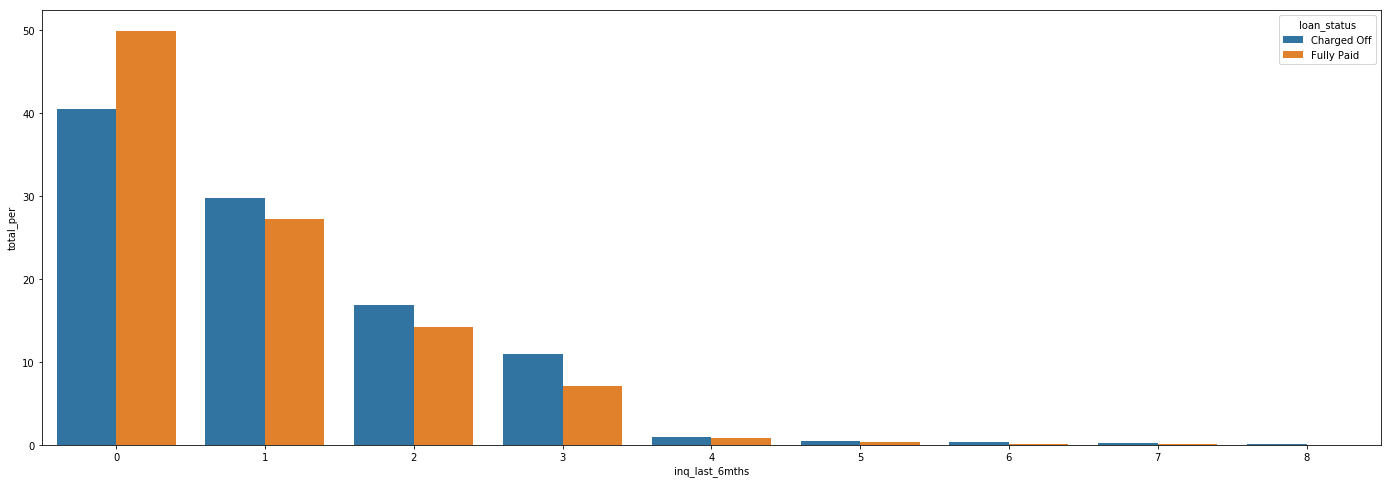

In [69]:
#Get the count of Grouped by loan_status and plot
inq_last_6mths = master_num.groupby(['loan_status','inq_last_6mths'])['inq_last_6mths'].count()
inq_last_6mths_per = inq_last_6mths.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
inq_last_6mths_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='inq_last_6mths', y='total_per', hue='loan_status',data=inq_last_6mths_per)

Though inq_last_6mths greater than 0 has got some defaults there is no significant difference

Now lets look at the open_acc

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


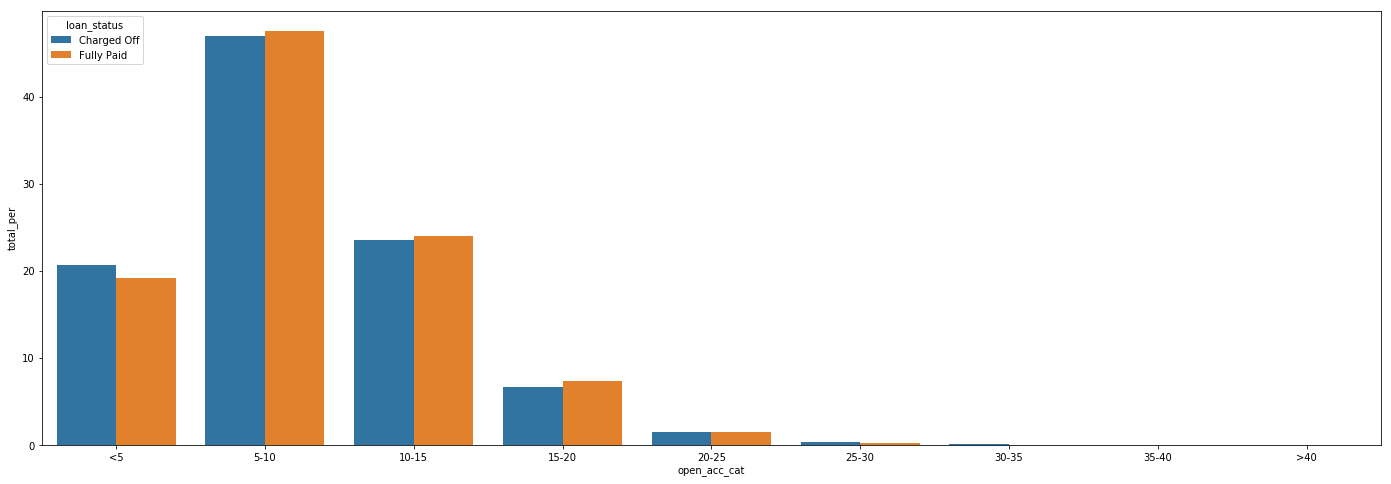

In [70]:
#Binning the open acc values
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
labels = [ '<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','>40']
master_num['open_acc_cat'] = pd.cut(master_num['open_acc'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
open_acc_cat = master_num.groupby(['loan_status','open_acc_cat'])['open_acc_cat'].count()
open_acc_cat_per = open_acc_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
open_acc_cat_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='open_acc_cat', y='total_per', hue='loan_status',data=open_acc_cat_per)

Number of Open acccount has got more defaults

Now lets look at the detailed view of it.

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


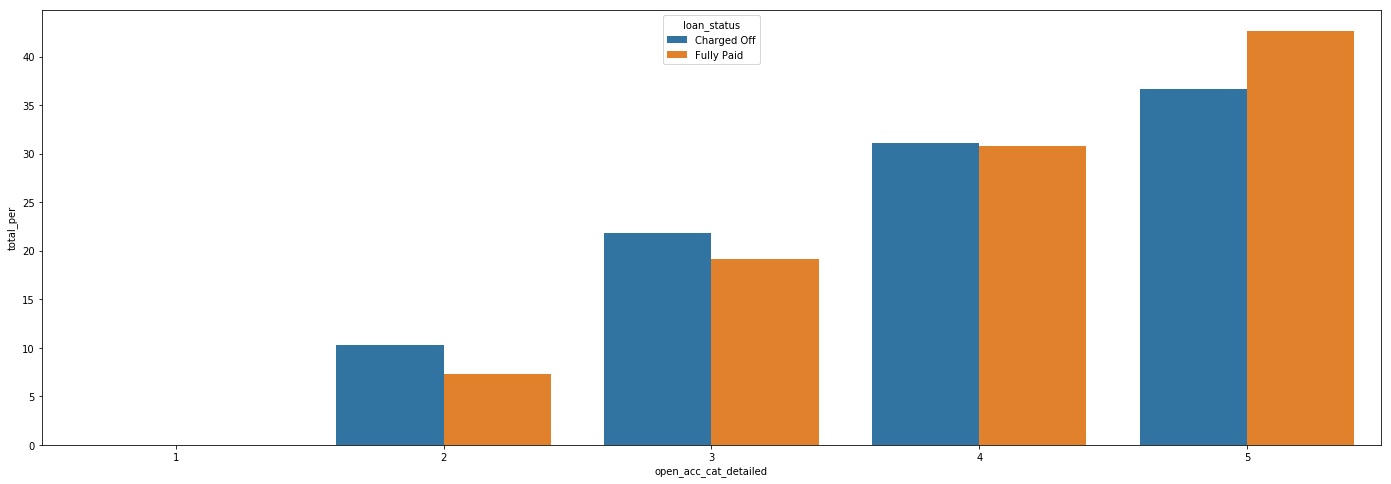

In [71]:
#Expand the bin of open acc between 0 - 5 for detailed view
bins = [0, 1, 2, 3, 4, 5]
labels = ['1','2','3','4','5']
master_num['open_acc_cat_detailed'] = pd.cut(master_num['open_acc'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
open_acc_cat_detailed = master_num.groupby(['loan_status','open_acc_cat_detailed'])['open_acc_cat'].count()
open_acc_cat_detailed_per = open_acc_cat_detailed.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
open_acc_cat_detailed_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='open_acc_cat_detailed', y='total_per', hue='loan_status',data=open_acc_cat_detailed_per)

Number of Open account less than 5 has got more defaults

Lets look at the public record against loan status

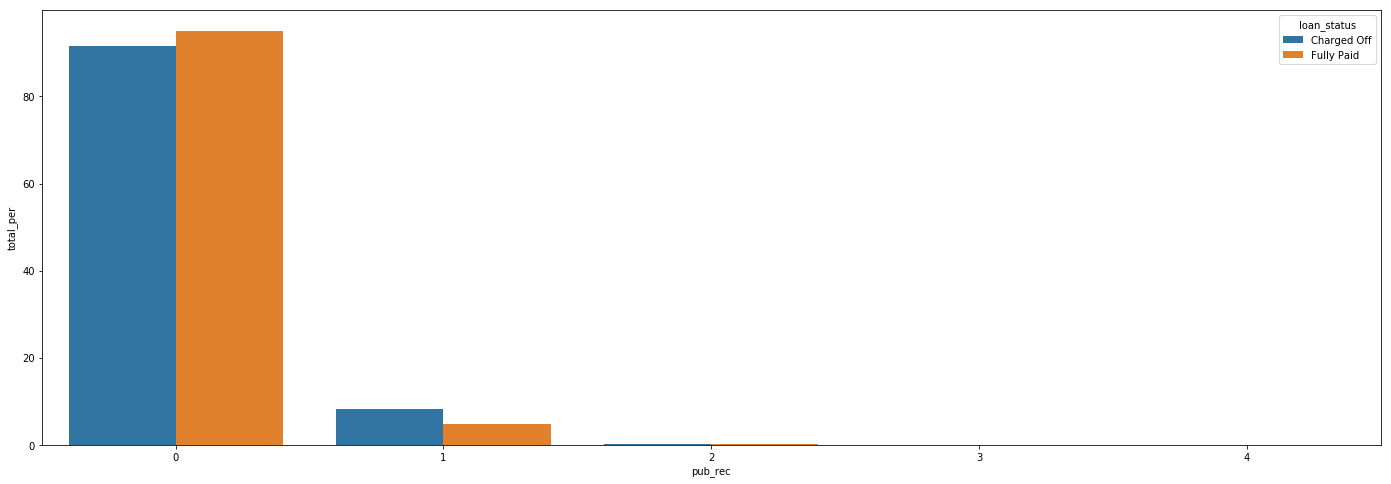

In [72]:
#Get the count of Grouped by loan_status and plot
pub_rec = master_num.groupby(['loan_status','pub_rec'])['pub_rec'].count()
pub_rec_per = pub_rec.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
pub_rec_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.barplot(x='pub_rec', y='total_per', hue='loan_status',data=pub_rec_per)

Number of Public records greater than 0 has more defaults

Lets look at the revolving utilization rate against loan status

C:\Users\jsaikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


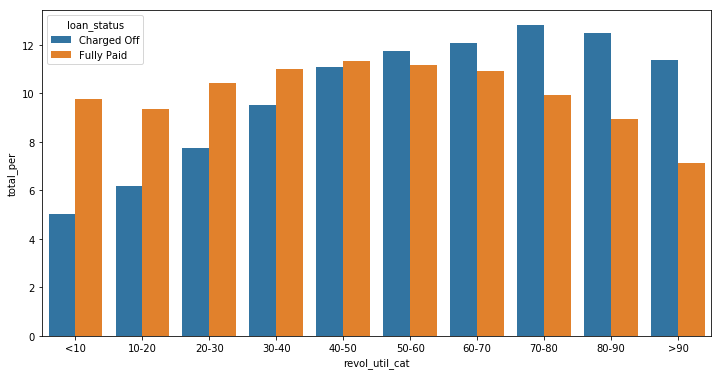

In [73]:
#Binnin revol_util values
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [ '<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90', '>90']
master_num['revol_util_cat'] = pd.cut(master_num['revol_util'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
revol_util_cat = master_num.groupby(['loan_status','revol_util_cat'])['revol_util_cat'].count()
revol_util_cat_per = revol_util_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
revol_util_cat_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(x='revol_util_cat', y='total_per', hue='loan_status',data=revol_util_cat_per)

Revolving utilization greater than 50 has more defaults. 

# Multivariate Analysis - Correlation between the identified variables

Pick the identified variables and form a Data Frame

C:\Users\jsaikumar\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


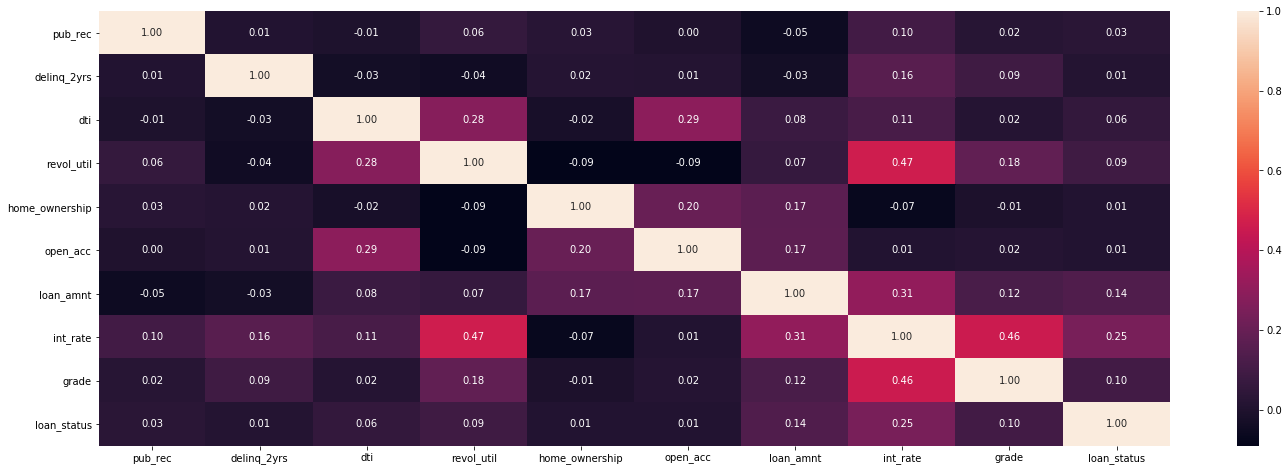

In [74]:
#Select the identified variables
master_loan_final = master_loan[['pub_rec','delinq_2yrs','dti','revol_util','home_ownership','open_acc','loan_amnt','int_rate','grade','loan_status']]

#factorize the category columns to find correlation 
labels, levels = pd.factorize(master_loan_final.home_ownership)
master_loan_final.home_ownership = labels

labels, levels = pd.factorize(master_loan_final.grade)
master_loan_final.grade = labels

labels, levels = pd.factorize(master_loan_final.loan_status)
master_loan_final.loan_status = labels

#Plot the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.heatmap(master_loan_final.corr(), annot=True, fmt=".2f")

C:\Users\jsaikumar\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


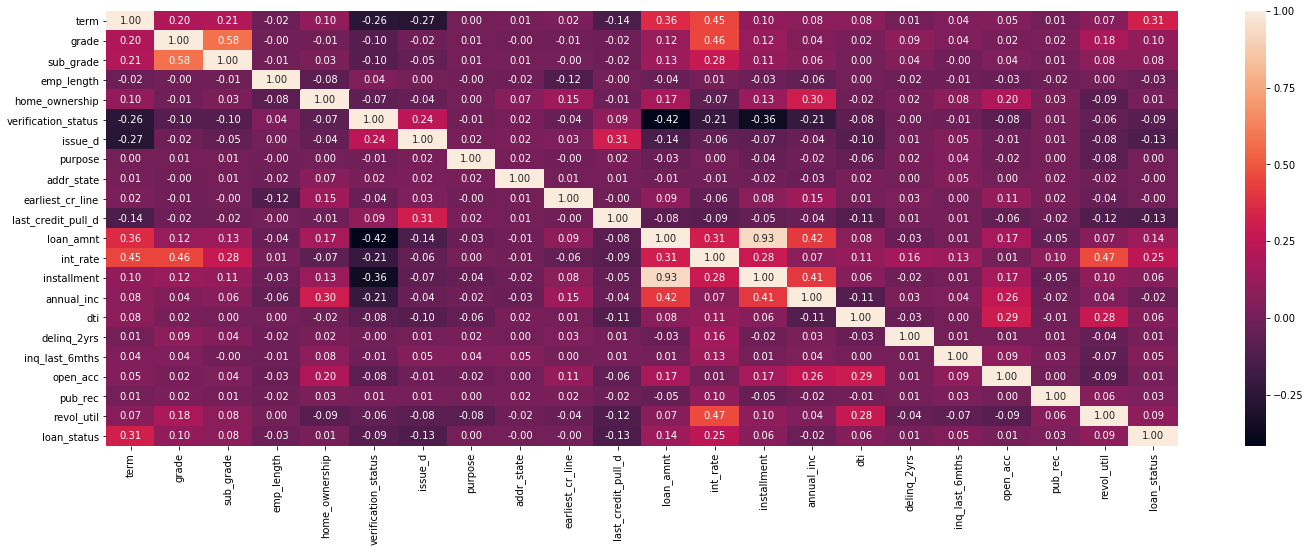

In [75]:
#Heatmap of all variables
column_list = master_loan_cat.columns.tolist() + master_loan_num.columns.tolist()
column_list.remove('annual_inc_cat')
column_list.remove('loan_status')

#Select the identified variables
master_loan_final = master_loan[column_list]

#factorize the category columns to find correlation 
labels, levels = pd.factorize(master_loan_final.term)
master_loan_final.term = labels

labels, levels = pd.factorize(master_loan_final.grade)
master_loan_final.grade = labels

labels, levels = pd.factorize(master_loan_final.sub_grade)
master_loan_final.sub_grade = labels

labels, levels = pd.factorize(master_loan_final.emp_length)
master_loan_final.emp_length = labels

labels, levels = pd.factorize(master_loan_final.home_ownership)
master_loan_final.home_ownership = labels

labels, levels = pd.factorize(master_loan_final.verification_status)
master_loan_final.verification_status = labels

labels, levels = pd.factorize(master_loan_final.issue_d)
master_loan_final.issue_d = labels

labels, levels = pd.factorize(master_loan_final.loan_status)
master_loan_final.loan_status = labels

labels, levels = pd.factorize(master_loan_final.purpose)
master_loan_final.purpose = labels

labels, levels = pd.factorize(master_loan_final.addr_state)
master_loan_final.addr_state = labels

labels, levels = pd.factorize(master_loan_final.earliest_cr_line)
master_loan_final.earliest_cr_line = labels

labels, levels = pd.factorize(master_loan_final.last_credit_pull_d)
master_loan_final.last_credit_pull_d = labels

#Plot the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sns.heatmap(master_loan_final.corr(), annot=True, fmt=".2f")